In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# importing mnist dataset
# image values
Xtrain_data = pd.read_csv('Xtrain.csv', dtype=float)
Xtrain = Xtrain_data.values
Ytrain_data = pd.read_csv('Ytrain.csv', dtype=float)
Ytrain = Ytrain_data.values

# binary values
Xtest_data = pd.read_csv('Xtest.csv', dtype=float)
Xtest = Xtest_data.values
Ytest_data = pd.read_csv('Ytest.csv', dtype=float)
Ytest = Ytest_data.values

In [40]:
# creating an initial list of weights

w_list = []
i = 0
iMax = 784
while i < iMax:
    w_list.append(random.uniform(-0.01,0.01))
    i += 1
w_list.append(0)
w = np.array(w_list)

In [4]:
w

array([ 5.02699418e-03, -9.00935099e-03, -7.91538909e-03,  7.16790976e-03,
        8.81291254e-03, -7.15749754e-03, -8.46880744e-03,  1.14534479e-03,
       -2.03249768e-03, -2.11039951e-03,  5.82910857e-03,  1.05612681e-03,
       -5.40321645e-03, -5.97000642e-03, -7.87459617e-03, -3.61672403e-03,
       -1.13291033e-03,  7.88290982e-03,  9.81627416e-03, -6.25090820e-04,
       -2.72376021e-04, -3.97521584e-03, -7.34530926e-03, -6.62426708e-03,
        6.97988253e-03, -1.72701252e-03,  9.20214190e-03,  4.72099046e-03,
       -8.04484831e-03,  5.10329596e-03, -2.88343792e-03, -6.10149600e-05,
       -2.92353715e-03,  5.91439455e-03, -4.01288304e-03, -3.71450119e-03,
        4.50749598e-03,  1.08541031e-03, -6.14161258e-03,  7.96332070e-03,
        7.74373244e-03, -7.88638983e-04,  1.09202792e-03, -1.62263766e-04,
        4.64390979e-03,  8.56592991e-03, -7.95246222e-03,  8.58942160e-04,
       -9.28892860e-03, -9.87932995e-03, -4.89234221e-03,  6.13632048e-03,
        1.00093389e-03, -

In [5]:
# building the gradient descent class

class GradientDescent():
    def __init__(self, binary_value, weights): # input binary value array, initial weights/bias array
        self.data = None # image data array
        self.train = binary_value
        self.weights = weights
    
    def hyperplane(self): # hyperplane function
        b = self.weights[-1] # save the current bias value
        z = np.delete(self.weights, -1) # create temporary weight list without the bias
        z = z*self.data # multiply the weight list by the image array data
        return sum(np.append(z, b)) # return the sum of the hyperplane with the bias added
    
    def sigmoid(self):
        return 1/(1+np.exp(-(self.hyperplane()))) # this returns the predicted probability for True/False
    
    def gradient(self, M): # M = current image index
        grad = -(self.train[M]-self.sigmoid())*self.data # create gradient list from image data 
        grad = np.append(grad, -(self.train[M]-self.sigmoid())) # append bias gradient
        return grad
    
    def gradient_descent(self, g, M): # update the weights/bias list once; g = learning rate, M = current image index
        self.weights = self.weights - (g*self.gradient(M))
    
    def loss(self, M): # calculates the loss function value for the current image iteration
        return -(self.train[M]*np.log(self.sigmoid())+(1-self.train[M])*np.log(1-self.sigmoid()))
    
    def execute(self, g, M, train_data):
        loss_values = np.array([])
        for image in range(M-1):
            print(f'Current Image: {image}, Total Images: {M}')
            self.data = train_data[image] # initialize the image array data 
            self.gradient_descent(g, image) # update the weights list 
            loss_values = np.append(loss_values, self.loss(image)) # calculate the loss function value for this iteration
        np.savetxt('lossvalues.txt', loss_values)
        np.savetxt('weights.txt', self.weights)
        return self.weights

In [31]:
# building the test class to test the accuracy of weights

class TestWeights():
    def __init__(self):
        self.weights = None
        self.data = None
        self.binary_values = None
        self.probability = None # array to store whether weights/bias thinks an image is a 0 or not
    
    # import hyperplane/sigmoid functions from grad descent as they are used here
    def hyperplane(self):
        b = self.weights[-1] 
        z = np.delete(self.weights, -1) 
        z = z*self.data 
        return sum(np.append(z, b)) # return the sum of the hyperplane with the bias added
    
    def sigmoid(self):
        return 1/(1+np.exp(-(self.hyperplane()))) 
    
    def test(self, test_data, binary_value, weights):
        self.binary_values = binary_value
        self.weights = weights
        self.probability = np.array([])
        for image in range(len(test_data)):
            self.data = test_data[image]
            if self.sigmoid() > 0.5:
                self.probability = np.append(self.probability, 1)
            else:
                self.probability = np.append(self.probability, 0)
        accuracy = 100 * (np.mean(self.probability == self.binary_values))
        print(self.probability == self.binary_values)
        return f'Current weights and bias values yield a detection accuracy of {accuracy}%.'

In [64]:
# testing grad descent

w_list = []
i = 0
iMax = 784
while i < iMax:
    w_list.append(random.uniform(-0.01,0.01))
    i += 1
w_list.append(0)
w = np.array(w_list)

test_grad_descent = GradientDescent(binary_value=Ytrain, weights=w)
test_grad_descent.execute(0.03, 50, Xtrain)

final_weights = np.loadtxt('weights.txt')
test_weights = TestWeights()
test_weights.test(Xtest, Ytest, final_weights)

Current Image: 0, Total Images: 50
Current Image: 1, Total Images: 50
Current Image: 2, Total Images: 50
Current Image: 3, Total Images: 50
Current Image: 4, Total Images: 50
Current Image: 5, Total Images: 50
Current Image: 6, Total Images: 50
Current Image: 7, Total Images: 50
Current Image: 8, Total Images: 50
Current Image: 9, Total Images: 50
Current Image: 10, Total Images: 50
Current Image: 11, Total Images: 50
Current Image: 12, Total Images: 50
Current Image: 13, Total Images: 50
Current Image: 14, Total Images: 50
Current Image: 15, Total Images: 50
Current Image: 16, Total Images: 50
Current Image: 17, Total Images: 50
Current Image: 18, Total Images: 50
Current Image: 19, Total Images: 50
Current Image: 20, Total Images: 50
Current Image: 21, Total Images: 50
Current Image: 22, Total Images: 50
Current Image: 23, Total Images: 50
Current Image: 24, Total Images: 50
Current Image: 25, Total Images: 50
Current Image: 26, Total Images: 50
Current Image: 27, Total Images: 50
Cu

'Current weights and bias values yield a detection accuracy of 90.1990199019902%.'

In [28]:
w

array([ 5.02699418e-03, -9.00935099e-03, -7.91538909e-03,  7.16790976e-03,
        8.81291254e-03, -7.15749754e-03, -8.46880744e-03,  1.14534479e-03,
       -2.03249768e-03, -2.11039951e-03,  5.82910857e-03,  1.05612681e-03,
       -5.40321645e-03, -5.97000642e-03, -7.87459617e-03, -3.61672403e-03,
       -1.13291033e-03,  7.88290982e-03,  9.81627416e-03, -6.25090820e-04,
       -2.72376021e-04, -3.97521584e-03, -7.34530926e-03, -6.62426708e-03,
        6.97988253e-03, -1.72701252e-03,  9.20214190e-03,  4.72099046e-03,
       -8.04484831e-03,  5.10329596e-03, -2.88343792e-03, -6.10149600e-05,
       -2.92353715e-03,  5.91439455e-03, -4.01288304e-03, -3.71450119e-03,
        4.50749598e-03,  1.08541031e-03, -6.14161258e-03,  7.96332070e-03,
        7.74373244e-03, -7.88638983e-04,  1.09202792e-03, -1.62263766e-04,
        4.64390979e-03,  8.56592991e-03, -7.95246222e-03,  8.58942160e-04,
       -9.28892860e-03, -9.87932995e-03, -4.89234221e-03,  6.13632048e-03,
        1.00093389e-03, -

In [9]:
final_weights

array([-8.25351642e-03, -2.22898616e-02, -2.11958997e-02, -6.11260084e-03,
       -4.46759806e-03, -2.04380081e-02, -2.17493180e-02, -1.21351658e-02,
       -1.53130083e-02, -1.53909101e-02, -7.45140203e-03, -1.22243838e-02,
       -1.86837270e-02, -1.92505170e-02, -2.11551068e-02, -1.68972346e-02,
       -1.44134209e-02, -5.39760078e-03, -3.46423644e-03, -1.39056014e-02,
       -1.35528866e-02, -1.72557264e-02, -2.06258199e-02, -1.99047777e-02,
       -6.30062807e-03, -1.50075231e-02, -4.07836870e-03, -8.55952014e-03,
       -2.13253589e-02, -8.17721464e-03, -1.61639485e-02, -1.33415256e-02,
       -1.62040478e-02, -7.36611605e-03, -1.72933936e-02, -1.69950118e-02,
       -8.77301462e-03, -1.21951003e-02, -1.94221232e-02, -5.31718990e-03,
       -5.53677816e-03, -1.40691496e-02, -1.21884827e-02, -1.34427744e-02,
       -8.63660081e-03, -4.71458069e-03, -2.12329728e-02, -1.24215684e-02,
       -2.25694392e-02, -2.31598406e-02, -1.81728528e-02, -7.14419012e-03,
       -1.22795767e-02, -

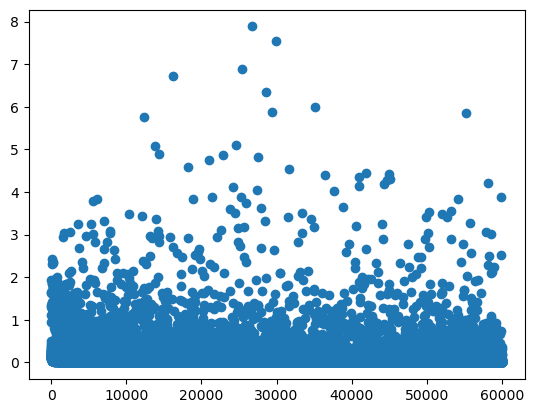

In [54]:
loss_value = np.loadtxt('lossvalues.txt')
plt.scatter(range(len(loss_value)), loss_value)